Step 1: Import necessary libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.simplefilter('ignore')


from IPython.display import display, Markdown


Step 2: Load dataset into a pandas dataframe

In [172]:
df = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')

Step 3: Load Data

In [173]:
df = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')

df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  Very frequently            Never   
1                No  ...        Sometimes           Rarely  Very frequently   
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

Data type identification 

In [174]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


Check for missing values

In [175]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

**Exploratory Data Analysis**

Part 1: Music listener profiles

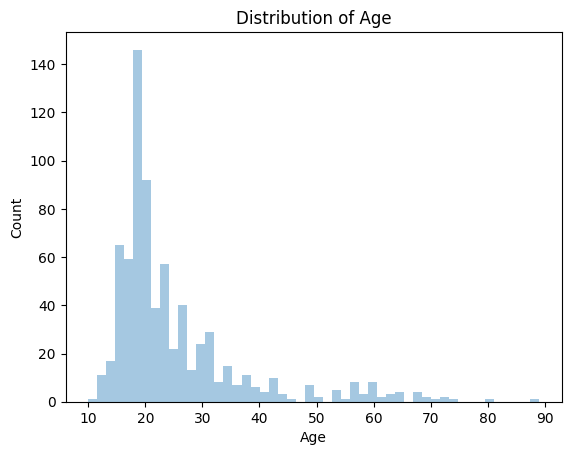

In [176]:
# plot the distribution of Age
g = sns.distplot(df['Age'], kde=False, bins=50)
g.set_title('Distribution of Age')
g.set_xlabel('Age')
g.set_ylabel('Count')
plt.show()

In [177]:
mean_age = df['Age'].mean()
print(mean_age)

25.206802721088437


In [178]:
max_age = df['Age'].max()

print(max_age)

89.0


In [179]:
min_age = df['Age'].min()

print(min_age)

10.0


Distribution of listening hours per week

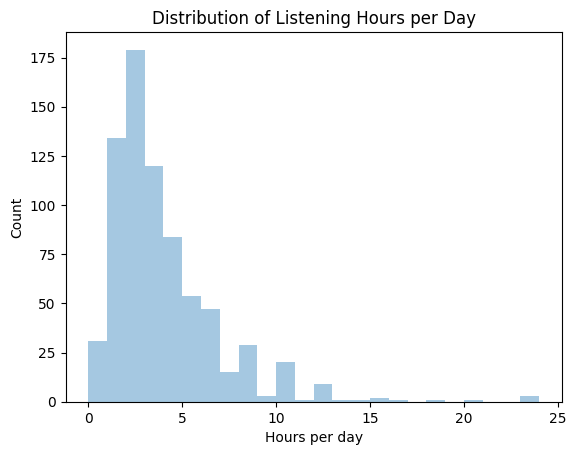

In [180]:
g = sns.distplot(df['Hours per day'], kde=False, bins=24)
g.set_title('Distribution of Listening Hours per Day')
g.set_xlabel('Hours per day')
g.set_ylabel('Count')
plt.show()

In [181]:
mean_hours = df['Hours per day'].mean()
print(mean_hours)

3.5727581521739133


In [182]:
max_hours = df['Hours per day'].max()
print(max_hours)

24.0


In [183]:
min_hours = df['Hours per day'].min()
print(min_hours)

0.0


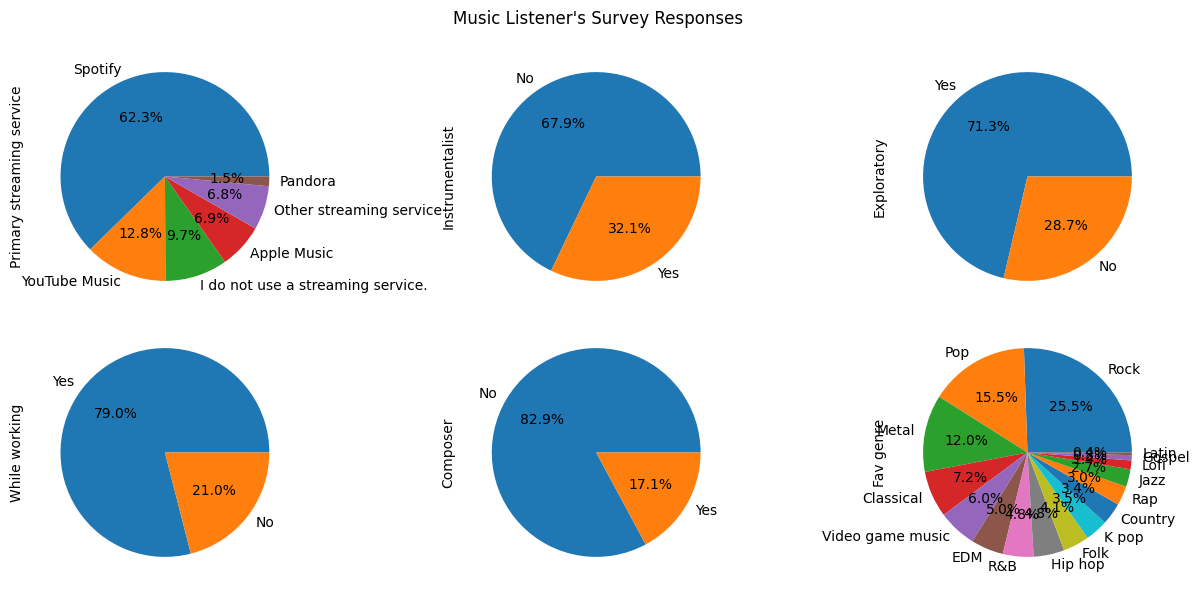

In [184]:
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)

# pie chart for proportion of primary streaming service 
df['Primary streaming service'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0])

# pie chart for proportion of listening to music while working
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0])

# pie chart for proportion of whether listener is a instrumentalist
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1])

# pie chart for proportion of whether listener is a composer
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1])

# pie chart for proportion of whether listener explores new music
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 2])

# pie chart for proportion of favourite genre
df['Fav genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 2])

plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

Part 2: Music genres

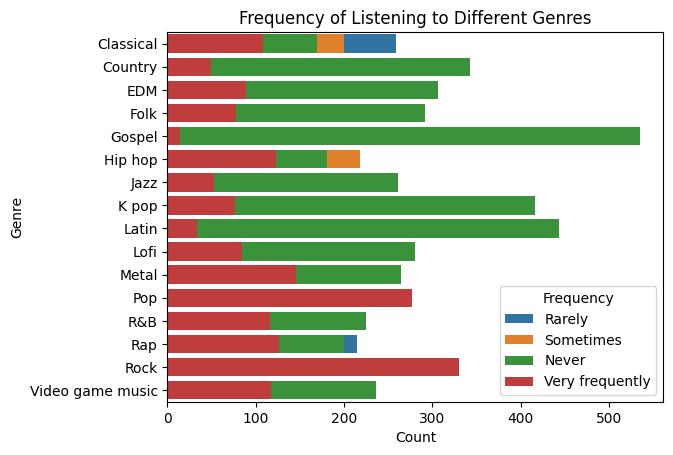

In [185]:
# select only the columns that start with 'Frequency'
genre_col = [col for col in df.columns if col.startswith('Frequency')]

df_genre = df[genre_col]
df_genre

# reform the dataframe to have a single column for genre and a single column for frequency
df_genre = df_genre.melt(var_name='Genre', value_name='Frequency')

# remove the 'Frequency[]' prefix from the genre column
df_genre['Genre'] = df_genre['Genre'].str.replace('Frequency ', '').str.replace('[', '').str.replace(']', '')

df_genre

# stack count chart for frequency of listening to different genres
g = sns.countplot(y='Genre', data=df_genre, order=df_genre['Genre'].value_counts().index, hue='Frequency', dodge=False)
g.set_title('Frequency of Listening to Different Genres')
g.set_xlabel('Count')
g.set_ylabel('Genre')
plt.show()

Is there a relationship between age and genre preference?

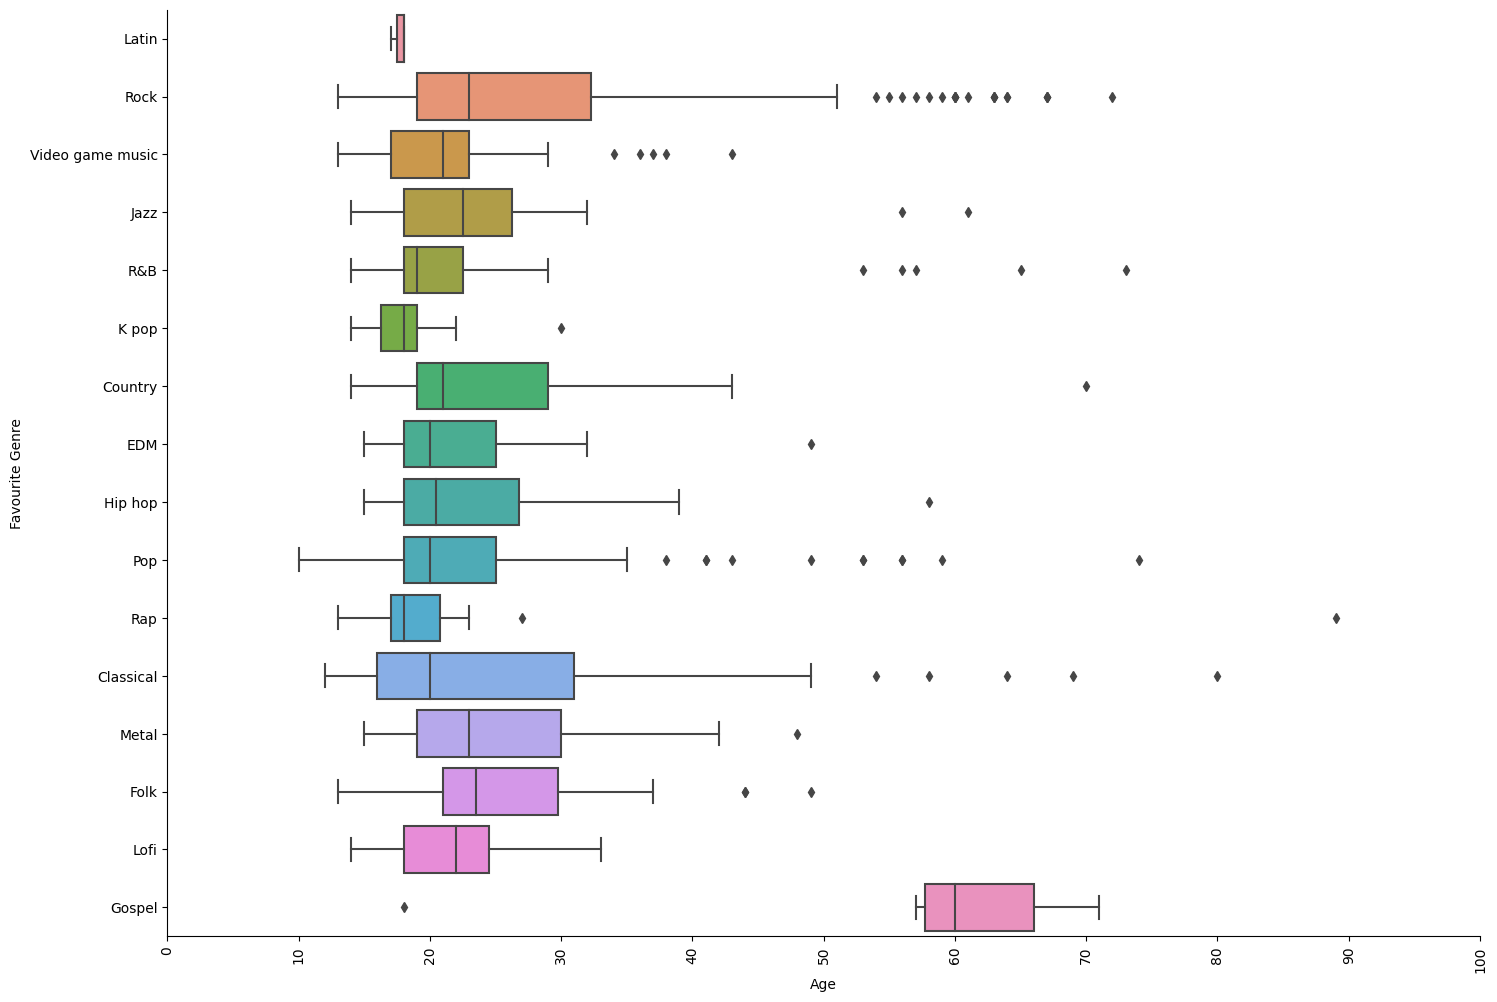

In [186]:
g = sns.catplot(x='Age', y='Fav genre', data=df, kind='box', height=10, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set_xlabels('Age')
g.set_ylabels('Favourite Genre')
g.set_titles('Age vs Favourite Genre')
plt.show()

Part 3: Mental health

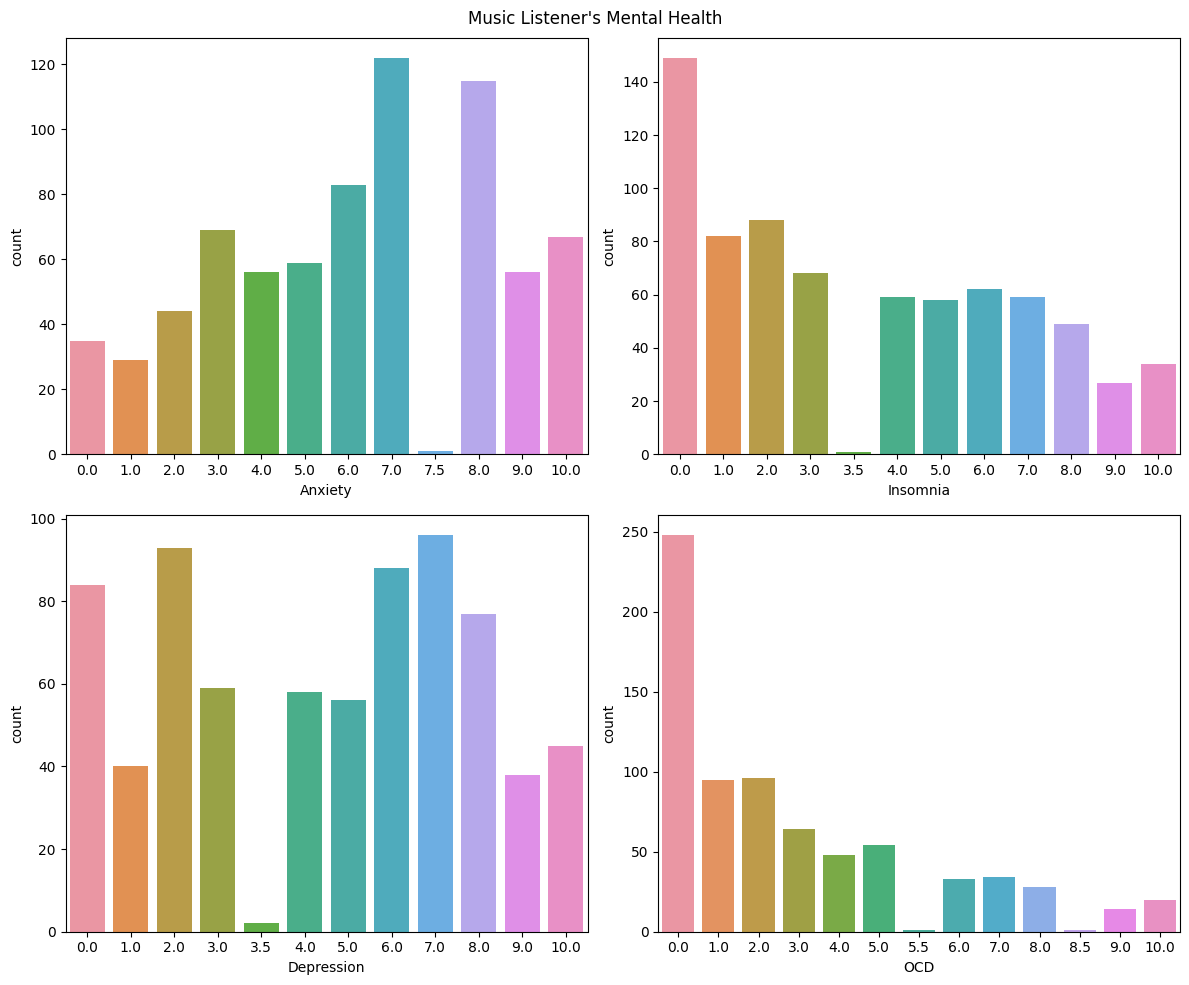

In [187]:
# Anxiety, Depression, Insomnia, and OCD

fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
sns.countplot(x='Anxiety', data=df, ax=ax[0, 0])
sns.countplot(x='Depression', data=df, ax=ax[1, 0])
sns.countplot(x='Insomnia', data=df, ax=ax[0, 1])
sns.countplot(x='OCD', data=df, ax=ax[1, 1])

plt.suptitle("Music Listener's Mental Health")
plt.tight_layout()
plt.show()

How music affects mental health?

Text(0.5, 1.0, 'Music Effects on Mental Health')

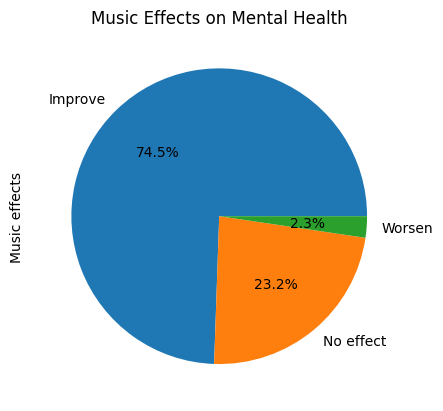

In [188]:
# plot the pie chart of music effects
df['Music effects'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Music Effects on Mental Health')

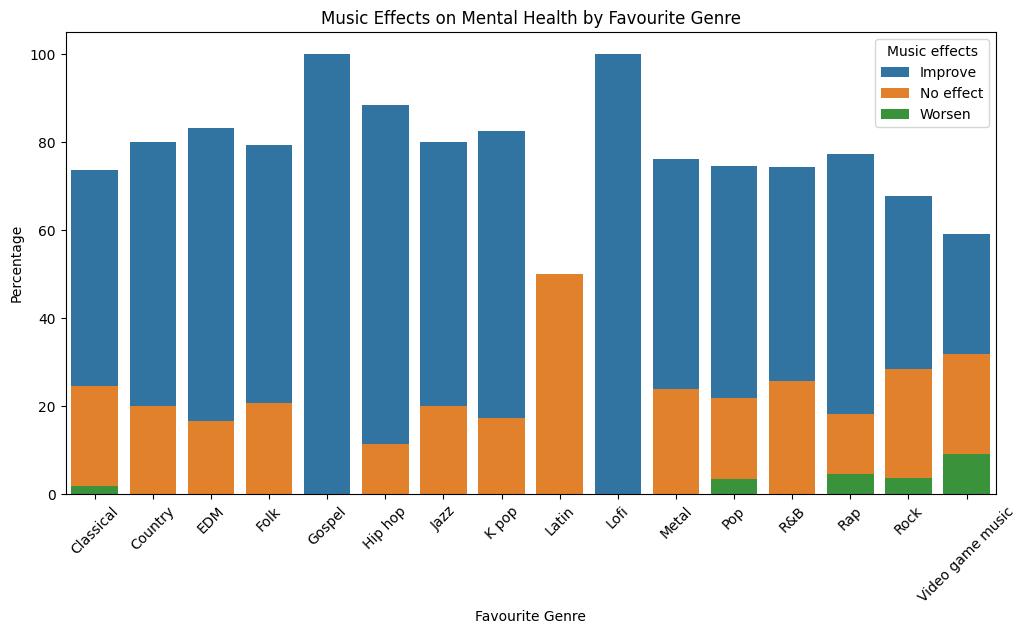

In [189]:
# Which genre has the highest ratio of listeners who believe their fav genre has a positive effect on their mental health?

df_fav_genre = df[['Fav genre', 'Music effects']]

# normalize the counts
df_fav_genre = df_fav_genre.groupby(['Fav genre', 'Music effects']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')

# plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Fav genre', y='Percentage', hue='Music effects', data=df_fav_genre, dodge=False, ax=ax)
ax.set_title('Music Effects on Mental Health by Favourite Genre')
ax.set_xlabel('Favourite Genre')
# tilt x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Percentage')
plt.show()

Feature engineering

In [190]:
# plot the correlation matrix heatmap

# encode the ordinal categorical variables in frequency columns

features_sel = ['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM',
                 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']

freq2num = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
df_genre = df[[col for col in df.columns if col.startswith('Frequency')]]
df_genre.replace(freq2num, inplace=True)

df_sel = pd.concat([df[features_sel], df_genre], axis=1)
df_sel.head()

Age  Hours per day While working Exploratory    BPM  Anxiety  Depression  \
0  18.0            3.0           Yes         Yes  156.0      3.0         0.0   
1  63.0            1.5           Yes         Yes  119.0      7.0         2.0   
2  18.0            4.0            No          No  132.0      7.0         7.0   
3  61.0            2.5           Yes         Yes   84.0      9.0         7.0   
4  18.0            4.0           Yes         Yes  107.0      7.0         2.0   

   Insomnia  OCD Music effects  ...  Frequency [Jazz]  Frequency [K pop]  \
0       1.0  0.0           NaN  ...                 0                  3   
1       2.0  1.0           NaN  ...                 3                  1   
2      10.0  2.0     No effect  ...                 1                  3   
3       3.0  3.0       Improve  ...                 3                  2   
4       5.0  9.0       Improve  ...                 0                  3   

   Frequency [Latin]  Frequency [Lofi]  Frequency [Metal]  Frequency [Pop]  \
0                  3                 1                  0                3   
1                  2                 1                  0                2   
2                  0                 2                  2                1   
3                  3                 2                  0                2   
4                  2                 2                  0                2   

   Frequency [R&B]  Frequency [Rap]  Frequency [Rock]  \
0                2                3                 0   
1                2                1                 3   
2                0                1                 1   
3                2                0                 0   
4                3                3                 0   

   Frequency [Video game music]  
0                             2  
1                             1  
2                             3  
3                             0  
4                             1  

[5 rows x 26 columns]

**Correlation matrix**

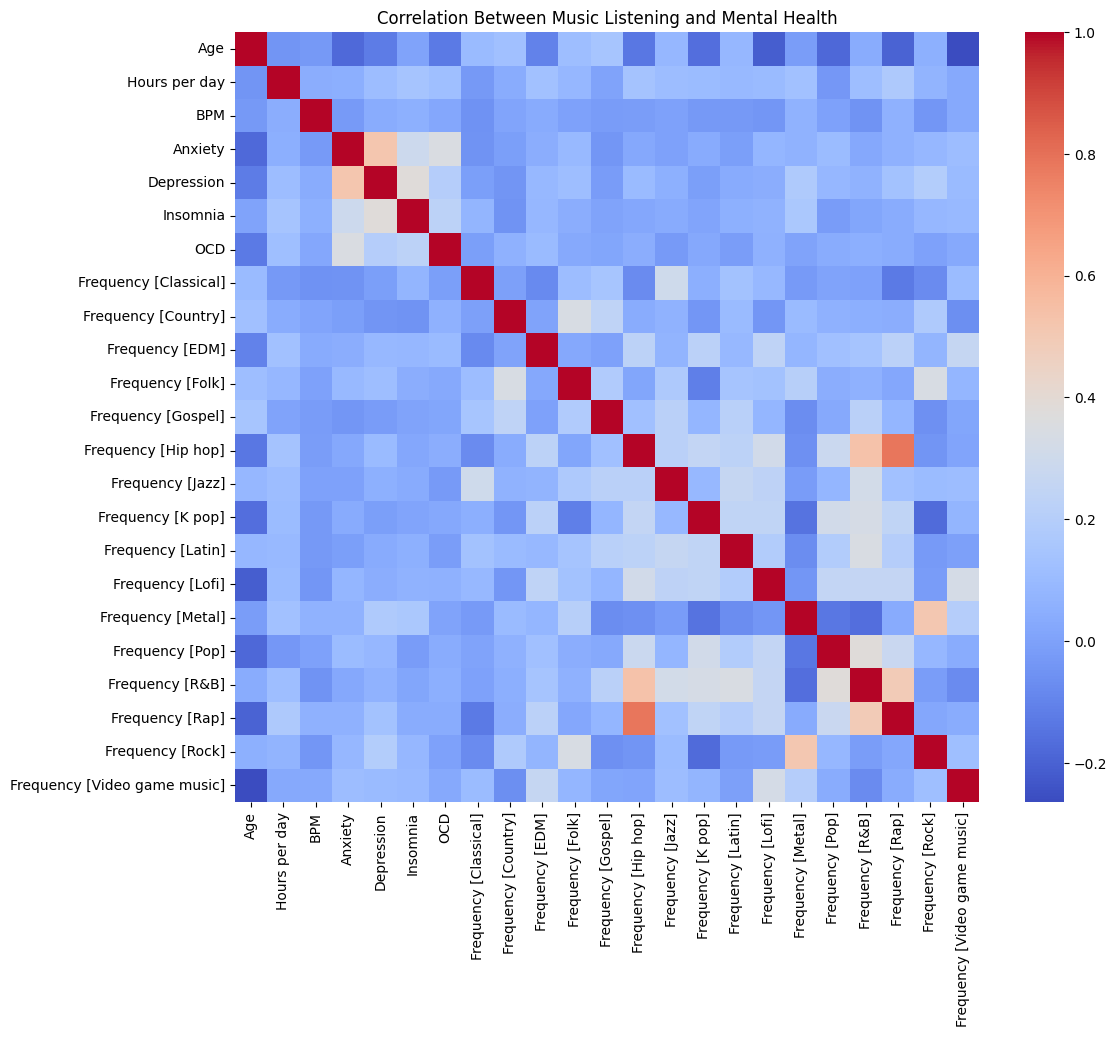

In [191]:
# plot the correlation matrix heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df_sel.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Music Listening and Mental Health')
plt.show()

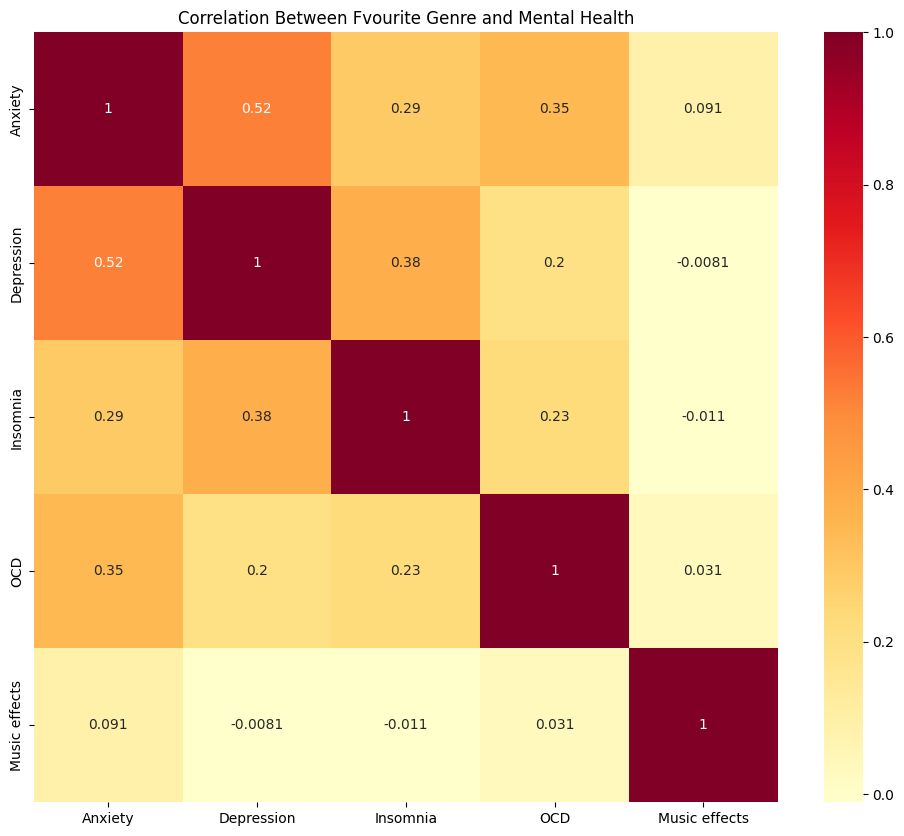

In [192]:
# how about fav genre and mental health?

df_fav_genre = df[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']]
df_fav_genre['Music effects'] = df_fav_genre['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})


# plot the correlation matrix heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df_fav_genre.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Between Fvourite Genre and Mental Health')
plt.show()

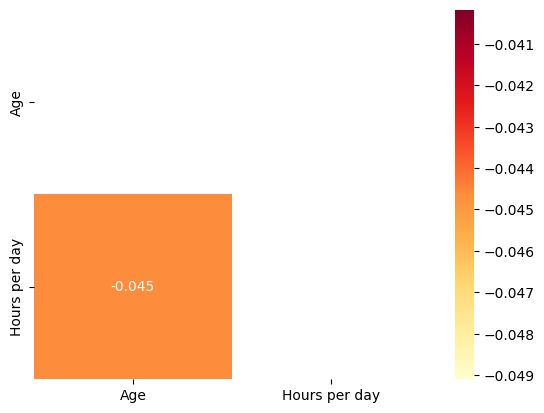

In [193]:
corr_m = df.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

In [194]:
df.corr()

Age  Hours per day       BPM   Anxiety  Depression  \
Age            1.000000      -0.044638 -0.029928 -0.176662   -0.121563   
Hours per day -0.044638       1.000000  0.042554  0.049319    0.110527   
BPM           -0.029928       0.042554  1.000000 -0.027050    0.041371   
Anxiety       -0.176662       0.049319 -0.027050  1.000000    0.519969   
Depression    -0.121563       0.110527  0.041371  0.519969    1.000000   
Insomnia       0.006909       0.141821  0.053591  0.292669    0.378996   
OCD           -0.130114       0.118729  0.018927  0.348350    0.196988   

               Insomnia       OCD  
Age            0.006909 -0.130114  
Hours per day  0.141821  0.118729  
BPM            0.053591  0.018927  
Anxiety        0.292669  0.348350  
Depression     0.378996  0.196988  
Insomnia       1.000000  0.226354  
OCD            0.226354  1.000000

In [195]:
methods = ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression']
err_metrics =  ['MAE', 'MSE', 'RMSE', 'MAPE']

In [196]:
def calculate_metrics(df, method, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    df.loc[method] = [mae, mse, rmse, mape]

In [197]:
# create error dataframe
error_df = pd.DataFrame(columns = err_metrics, index = methods)
display(error_df)

MAE  MSE RMSE MAPE
Linear Regression         NaN  NaN  NaN  NaN
Polynomial Regression     NaN  NaN  NaN  NaN
Lasso Regression          NaN  NaN  NaN  NaN
Ridge Regression          NaN  NaN  NaN  NaN
Elastic Net Regression    NaN  NaN  NaN  NaN
Decision Tree Regression  NaN  NaN  NaN  NaN
Random Forest Regression  NaN  NaN  NaN  NaN

In [198]:
df.shape

(736, 33)

In [199]:
df.describe()

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [201]:
cat_df = df.select_dtypes(exclude='number')
cat_df

Timestamp Primary streaming service While working  \
0     8/27/2022 19:29:02                   Spotify           Yes   
1     8/27/2022 19:57:31                   Pandora           Yes   
2     8/27/2022 21:28:18                   Spotify            No   
3     8/27/2022 21:40:40             YouTube Music           Yes   
4     8/27/2022 21:54:47                   Spotify           Yes   
..                   ...                       ...           ...   
731  10/30/2022 14:37:28                   Spotify           Yes   
732   11/1/2022 22:26:42                   Spotify           Yes   
733   11/3/2022 23:24:38   Other streaming service           Yes   
734   11/4/2022 17:31:47                   Spotify           Yes   
735    11/9/2022 1:55:20             YouTube Music           Yes   

    Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0               Yes      Yes             Latin         Yes               Yes   
1                No       No              Rock         Yes                No   
2                No       No  Video game music          No               Yes   
3                No      Yes              Jazz         Yes               Yes   
4                No       No               R&B         Yes                No   
..              ...      ...               ...         ...               ...   
731             Yes       No              Rock         Yes               Yes   
732             Yes       No               Pop         Yes               Yes   
733              No      Yes               Rap         Yes                No   
734             Yes       No         Classical          No                No   
735              No       No           Hip hop         Yes               Yes   

    Frequency [Classical] Frequency [Country]  ... Frequency [Latin]  \
0                  Rarely               Never  ...   Very frequently   
1               Sometimes               Never  ...         Sometimes   
2                   Never               Never  ...             Never   
3               Sometimes               Never  ...   Very frequently   
4                   Never               Never  ...         Sometimes   
..                    ...                 ...  ...               ...   
731       Very frequently              Rarely  ...         Sometimes   
732                Rarely              Rarely  ...             Never   
733                Rarely           Sometimes  ...            Rarely   
734       Very frequently               Never  ...             Never   
735             Sometimes              Rarely  ...             Never   

    Frequency [Lofi] Frequency [Metal]  Frequency [Pop]  Frequency [R&B]  \
0             Rarely             Never  Very frequently        Sometimes   
1             Rarely             Never        Sometimes        Sometimes   
2          Sometimes         Sometimes           Rarely            Never   
3          Sometimes             Never        Sometimes        Sometimes   
4          Sometimes             Never        Sometimes  Very frequently   
..               ...               ...              ...              ...   
731           Rarely            Rarely  Very frequently            Never   
732           Rarely             Never  Very frequently            Never   
733        Sometimes            Rarely        Sometimes        Sometimes   
734            Never             Never            Never            Never   
735           Rarely             Never        Sometimes  Very frequently   

     Frequency [Rap] Frequency [Rock] Frequency [Video game music]  \
0    Very frequently            Never                    Sometimes   
1             Rarely  Very frequently                       Rarely   
2             Rarely           Rarely              Very frequently   
3              Never            Never                        Never   
4    Very frequently            Never                       Rarely   
..               ...              ...  

<AxesSubplot: >

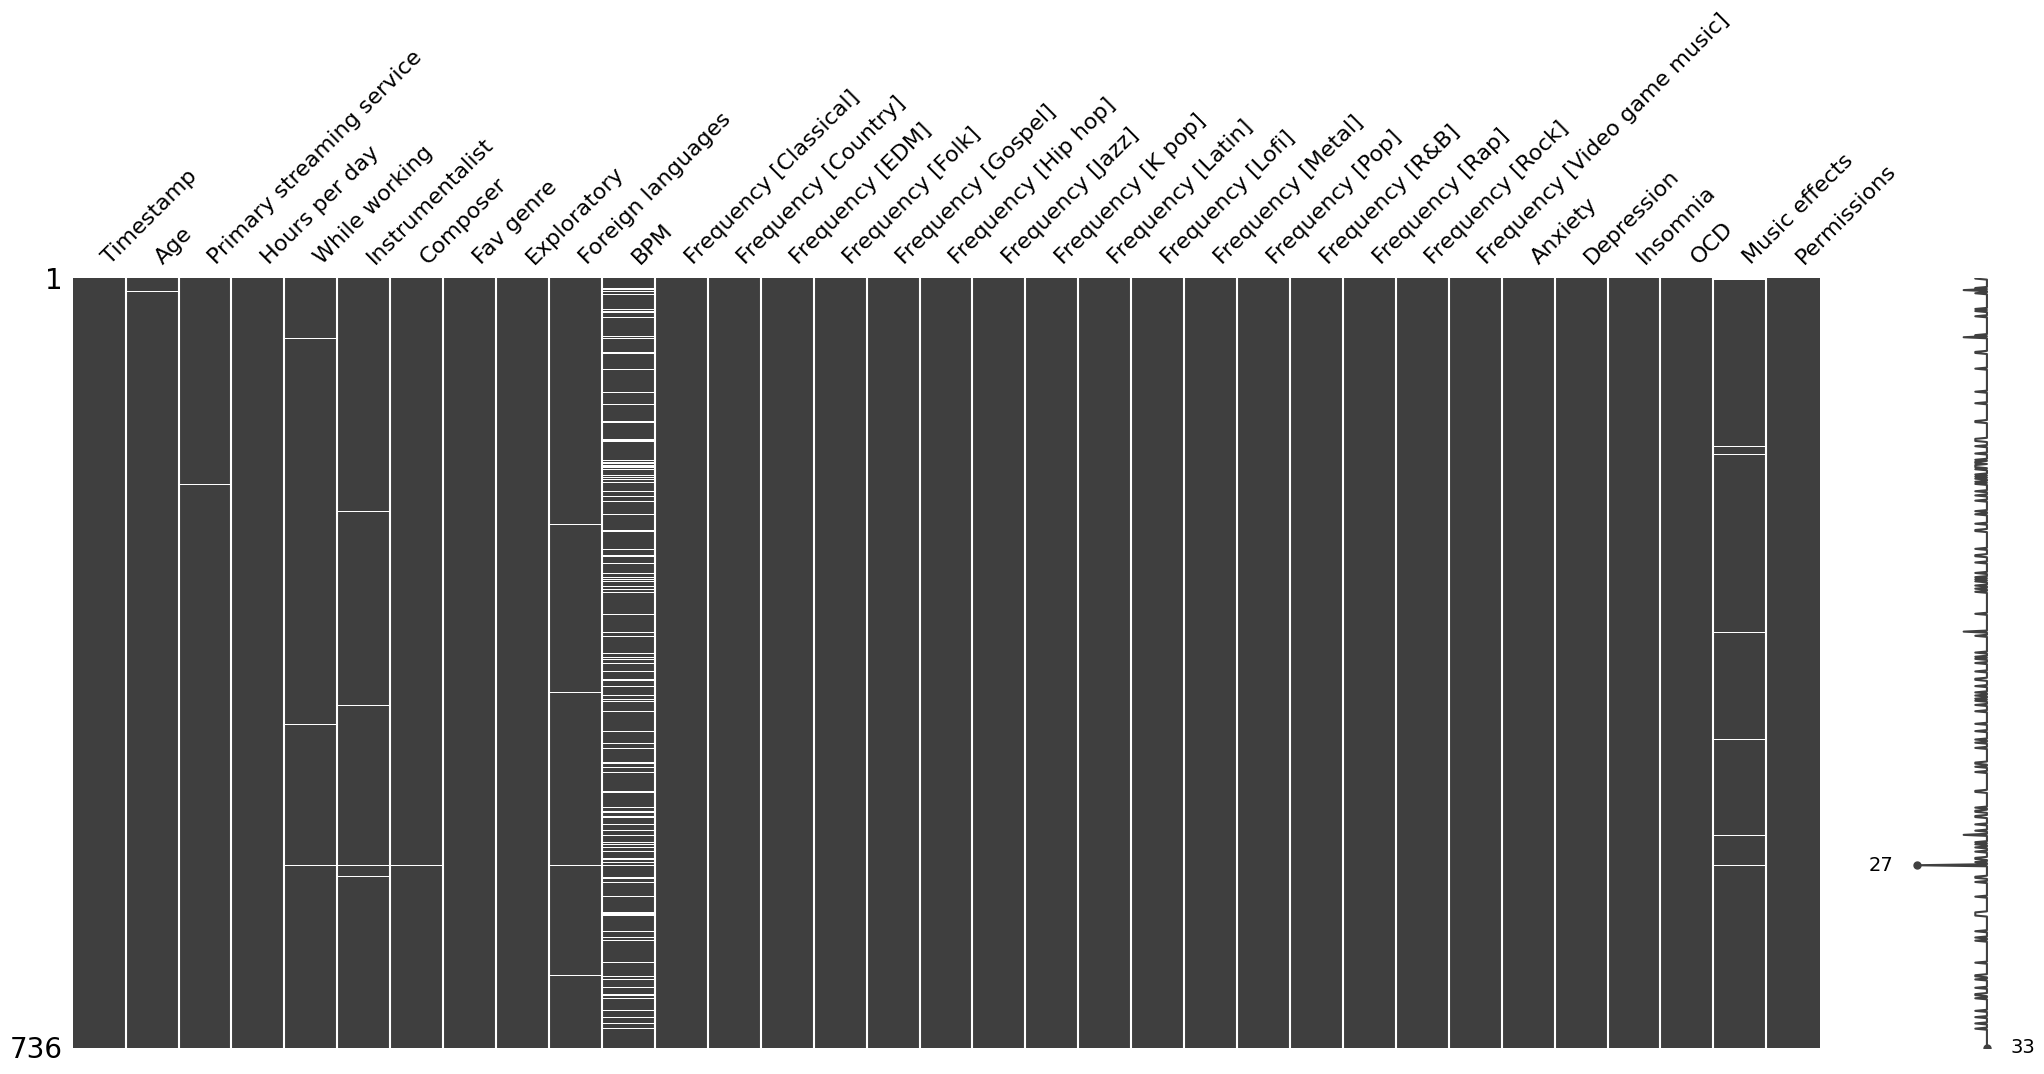

In [204]:
import missingno as msno
msno.matrix(df)

In [205]:
le_cols =  []

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in le_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(dataset[col])
display(df)

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

In [206]:
print(df.isna().head())

   Timestamp    Age  Primary streaming service  Hours per day  While working  \
0      False  False                      False          False          False   
1      False  False                      False          False          False   
2      False  False                      False          False          False   
3      False  False                      False          False          False   
4      False  False                      False          False          False   

   Instrumentalist  Composer  Fav genre  Exploratory  Foreign languages  ...  \
0            False     False      False        False              False  ...   
1            False     False      False        False              False  ...   
2            False     False      False        False              False  ...   
3            False     False      False        False              False  ...   
4            False     False      False        False              False  ...   

   Frequency [R&B]  Frequency [Rap]  F

In [207]:
print(df.isnull().sum())

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [208]:
missing_data = df[df.isna().any(axis=1)]
print(missing_data.head())


             Timestamp   Age Primary streaming service  Hours per day  \
0   8/27/2022 19:29:02  18.0                   Spotify            3.0   
1   8/27/2022 19:57:31  63.0                   Pandora            1.5   
10  8/27/2022 22:51:15  18.0                   Spotify            3.0   
12  8/27/2022 23:04:00   NaN                   Spotify            3.0   
15  8/27/2022 23:19:52  17.0                   Spotify            2.0   

   While working Instrumentalist Composer Fav genre Exploratory  \
0            Yes             Yes      Yes     Latin         Yes   
1            Yes              No       No      Rock         Yes   
10           Yes             Yes       No   Country         Yes   
12           Yes              No       No   Hip hop         Yes   
15            No              No       No       Pop         Yes   

   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                Yes  ...        Sometimes  Very frequently            Never  

AxesSubplot(0.125,0.11;0.698618x0.77)


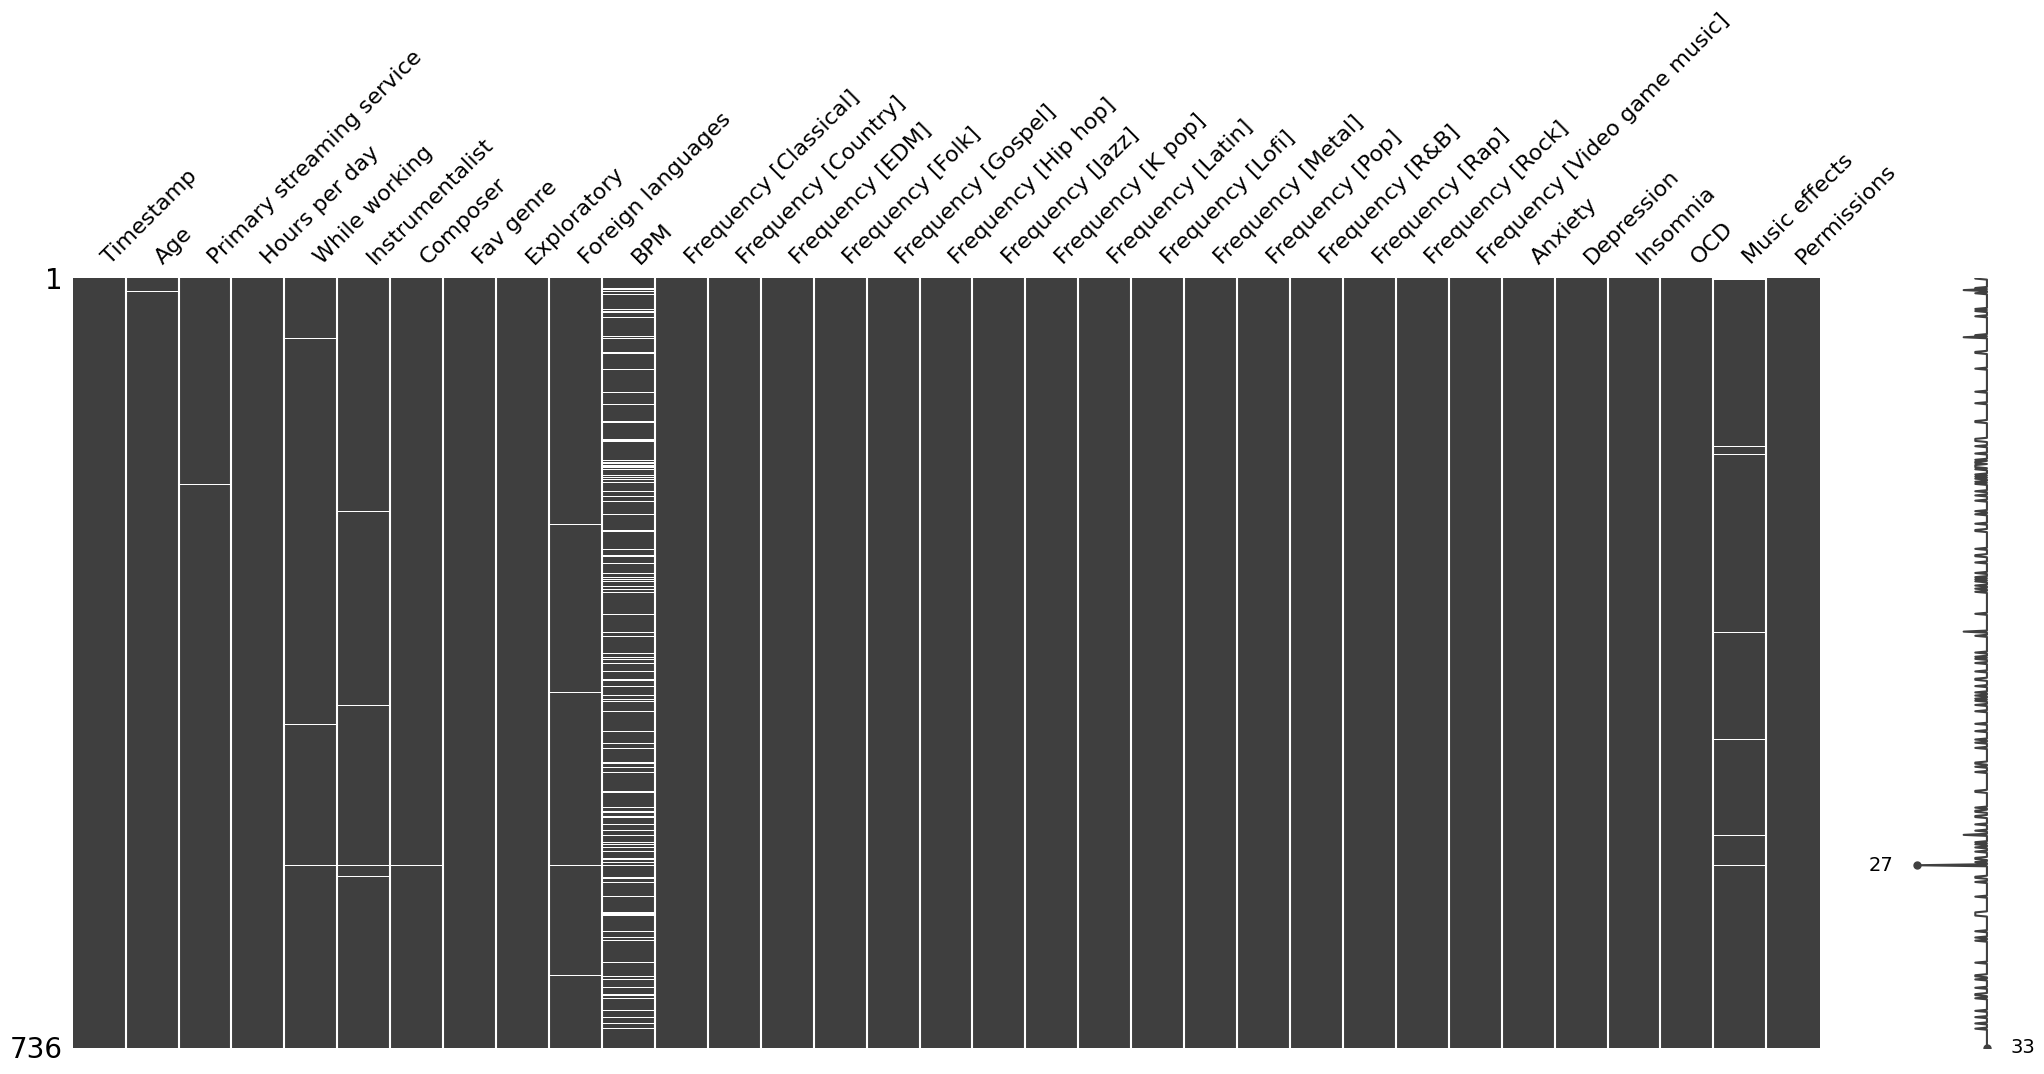

In [209]:
print(msno.matrix(df))

<AxesSubplot: >

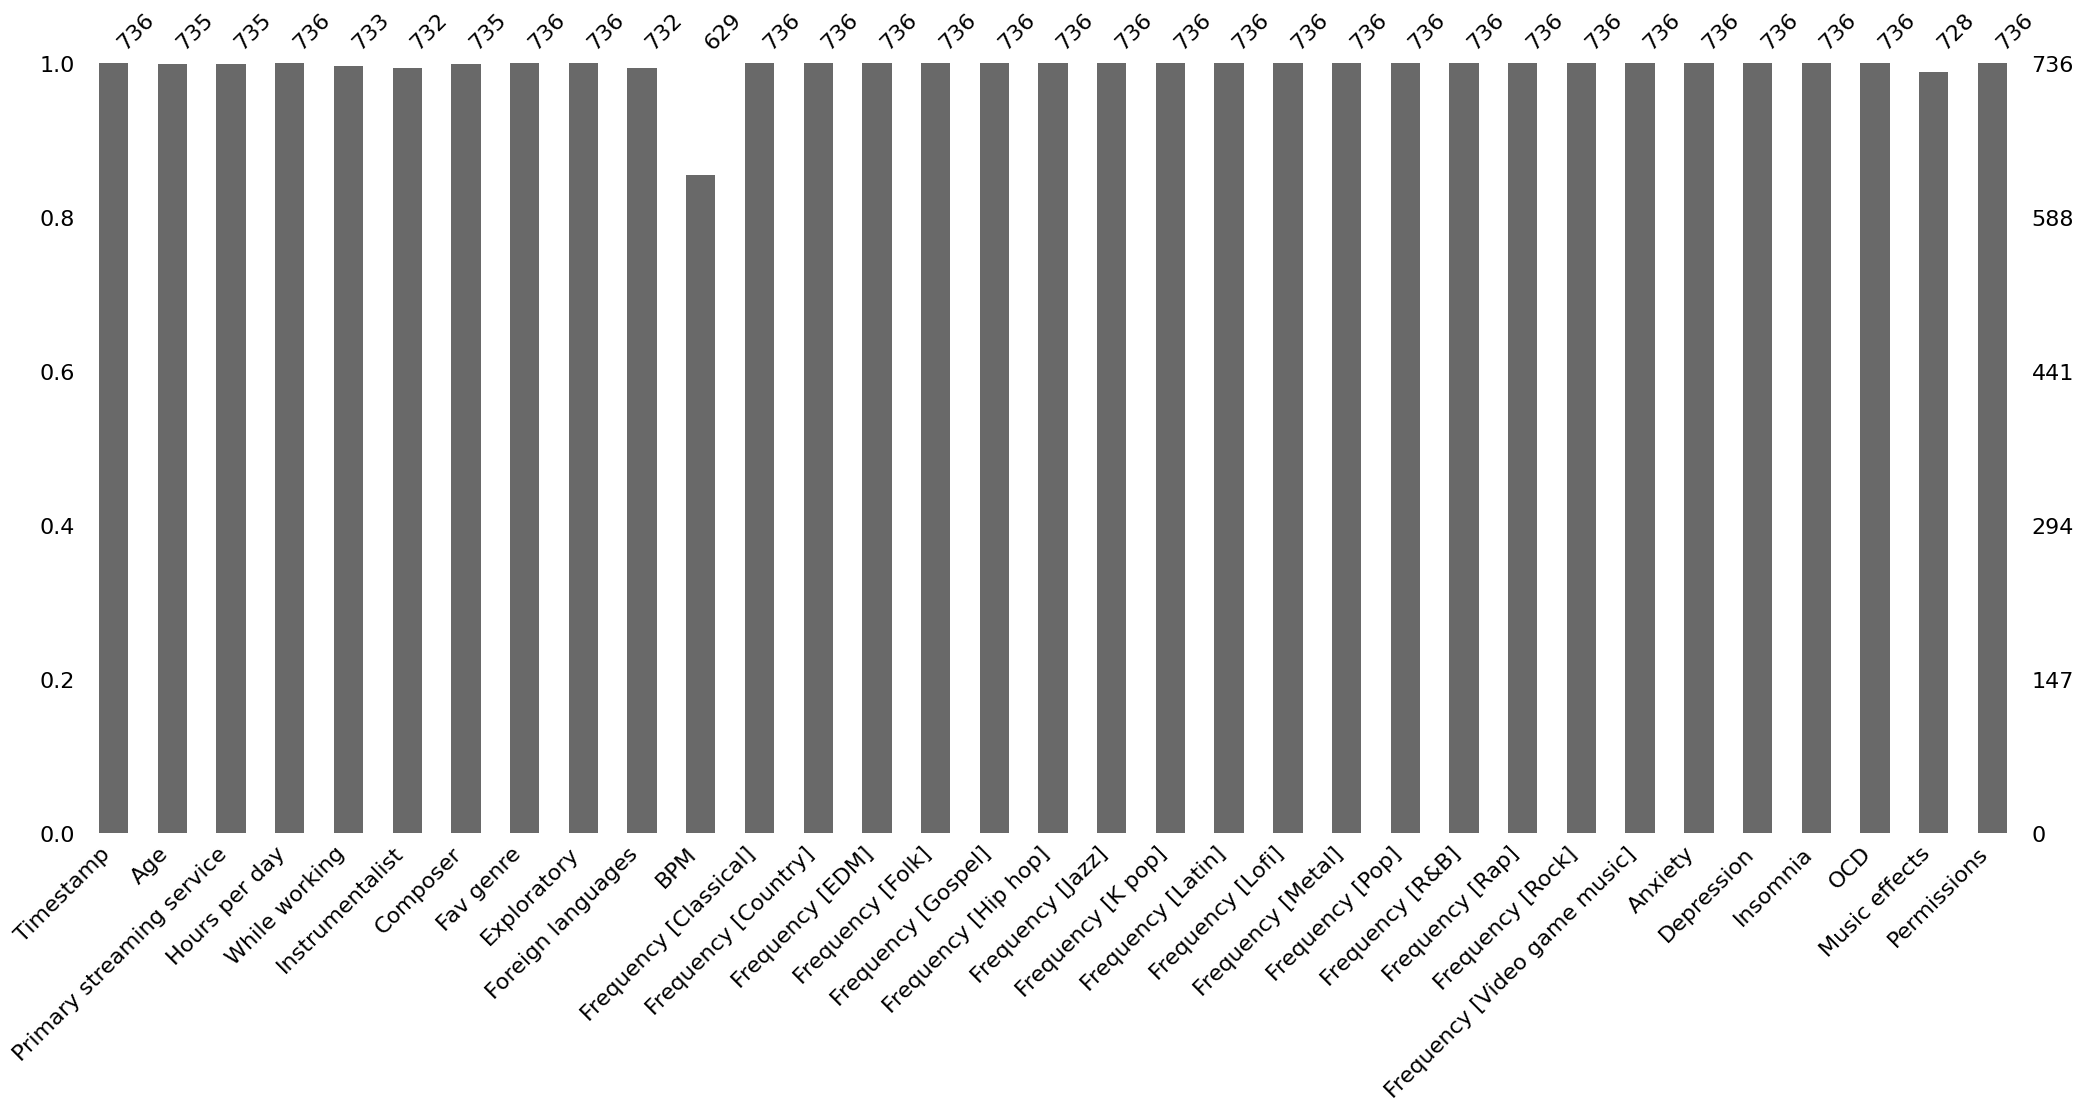

In [210]:
msno.bar(df)

<AxesSubplot: >

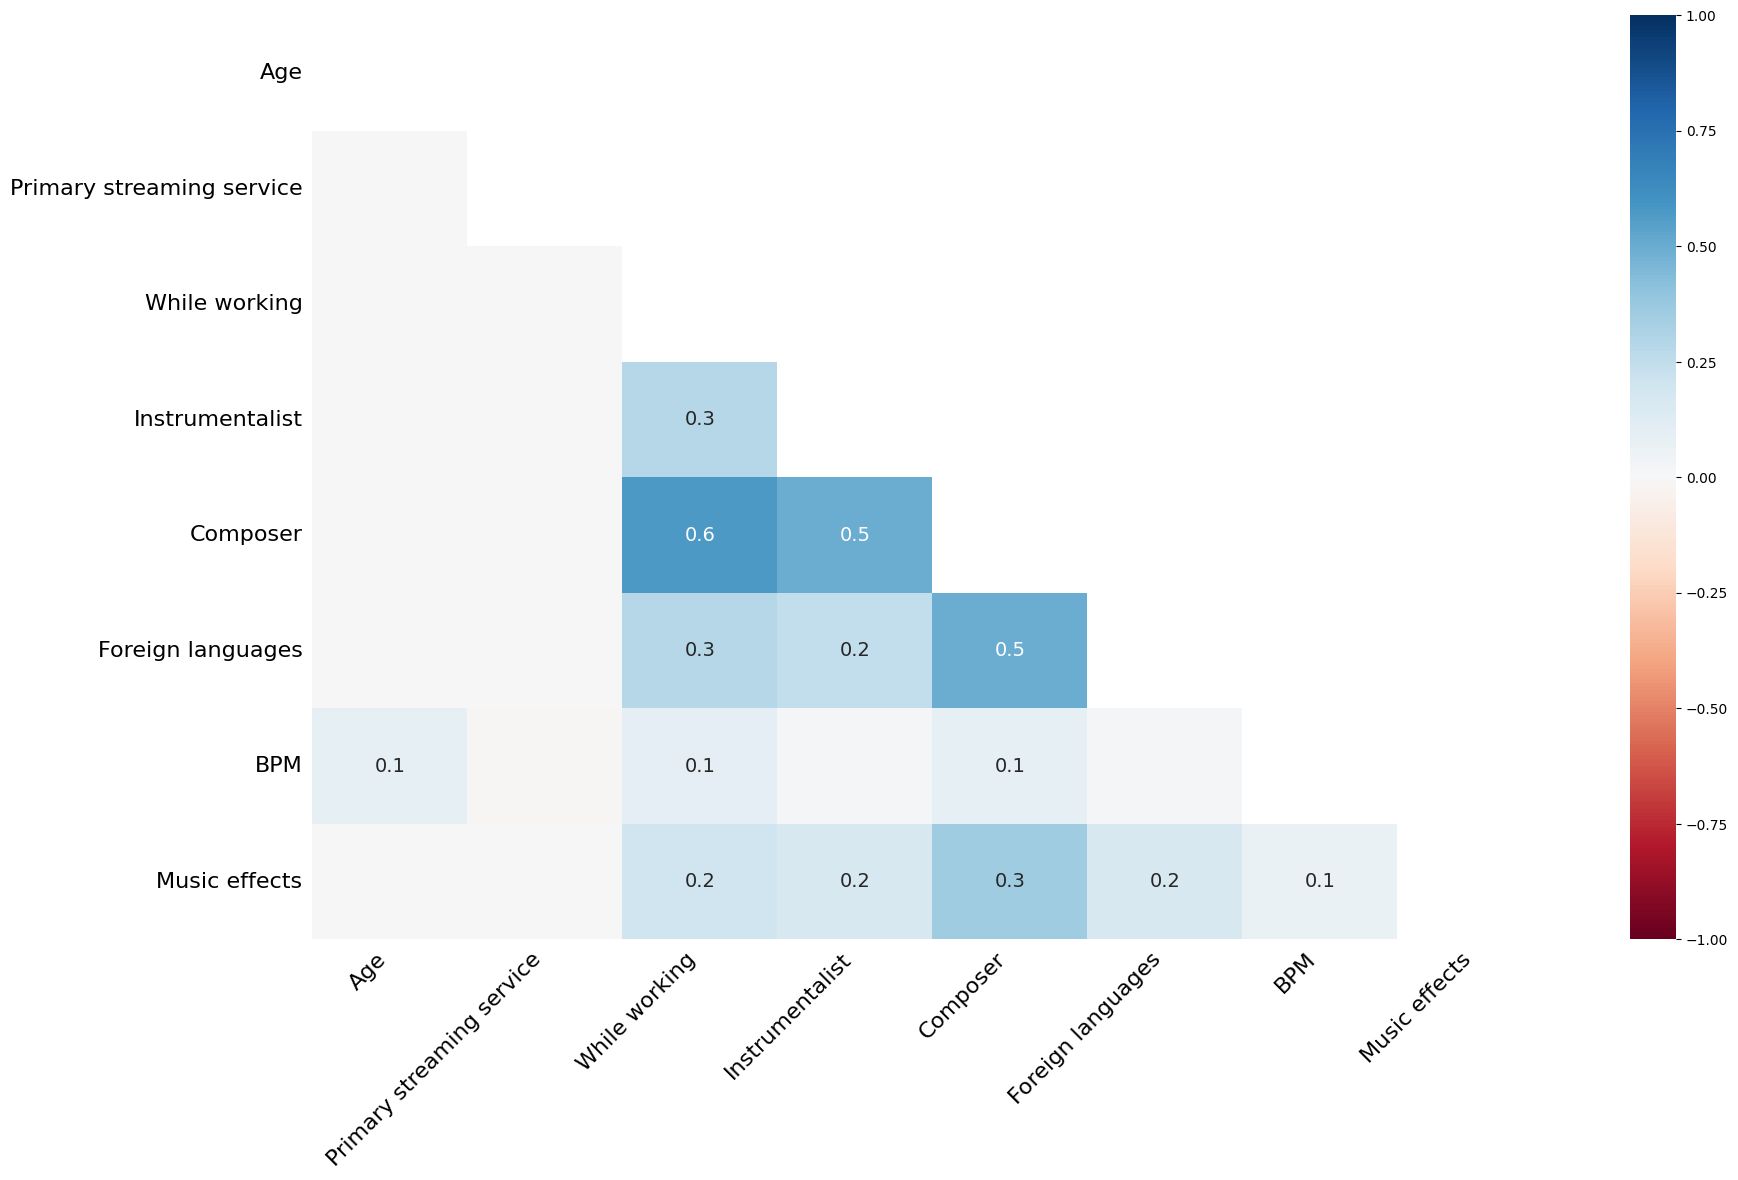

In [211]:
msno.heatmap(df)

In [212]:
from sklearn.impute import KNNImputer

In [234]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
data1_numeric = df[numeric_cols]

imputer = KNNImputer(n_neighbors=5)
data1_imputed = pd.DataFrame(imputer.fit_transform(data1_numeric), columns=numeric_cols )
df[numeric_cols] = data1_imputed

In [235]:
data1_imputed

Age  Hours per day    BPM  Anxiety  Depression  Insomnia  OCD
0    18.0            3.0  156.0      3.0         0.0       1.0  0.0
1    63.0            1.5  119.0      7.0         2.0       2.0  1.0
2    18.0            4.0  132.0      7.0         7.0      10.0  2.0
3    61.0            2.5   84.0      9.0         7.0       3.0  3.0
4    18.0            4.0  107.0      7.0         2.0       5.0  9.0
..    ...            ...    ...      ...         ...       ...  ...
731  17.0            2.0  120.0      7.0         6.0       0.0  9.0
732  18.0            1.0  160.0      3.0         2.0       2.0  5.0
733  19.0            6.0  120.0      2.0         2.0       2.0  2.0
734  19.0            5.0  170.0      2.0         3.0       2.0  1.0
735  29.0            2.0   98.0      2.0         2.0       2.0  5.0

[736 rows x 7 columns]

In [214]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

# Print the columns with categorical values
print("Categorical columns: ")
for col in categorical_cols:
    print(col)

Categorical columns: 
Timestamp
Primary streaming service
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Music effects
Permissions


In [215]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

# Print the columns with categorical values
print("Categorical columns: ")
for col in categorical_cols:
    print(col)

Categorical columns: 
Timestamp
Primary streaming service
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Music effects
Permissions


In [216]:

for col in categorical_cols:
    if col != 'title':
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = df.drop(col, axis=1)
        df = df.join(one_hot)
        

# Print the modified dataframe
df.head()

Age  Hours per day    BPM  Anxiety  Depression  Insomnia  OCD  \
0  18.0            3.0  156.0      3.0         0.0       1.0  0.0   
1  63.0            1.5  119.0      7.0         2.0       2.0  1.0   
2  18.0            4.0  132.0      7.0         7.0      10.0  2.0   
3  61.0            2.5   84.0      9.0         7.0       3.0  3.0   
4  18.0            4.0  107.0      7.0         2.0       5.0  9.0   

   Timestamp_10/11/2022 15:46:46  Timestamp_10/14/2022 18:01:12  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Timestamp_10/14/2022 20:42:26  ...  Frequency [Rock]_Sometimes  \
0                              0  ...                           0   
1                              0  ...                           0   
2                              0  ...                           0   
3                              0  ...                           0   
4                              0  ...                           0   

   Frequency [Rock]_Very frequently  Frequency [Video game music]_Never  \
0                                 0                                   0   
1                                 1                                   0   
2                                 0                                   0   
3                                 0                                   1   
4                                 0                                   0   

   Frequency [Video game music]_Rarely  \
0                                    0   
1                                    1   
2                                    0   
3                                    0   
4                                    1   

   Frequency [Video game music]_Sometimes  \
0                                       1   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Frequency [Video game music]_Very frequently  Music effects_Improve  \
0                                             0                      0   
1                                             0                      0   
2                                             1                      0   
3                                             0                      1   
4                                             0                      1   

   Music effects_No effect  Music effects_Worsen  Permissions_I understand.  
0                        0                     0                          1  
1                        0                     0                          1  
2                        1                     0                          1  
3                        0                     0                          1  
4                        0                     0                          1  

[5 rows x 842 columns]

In [217]:
for col in df.columns:
    # Check if the column contains non-binary numerical values
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 2:
        # Print the name of the column
        print(col)

Age
Hours per day
BPM
Anxiety
Depression
Insomnia
OCD


In [218]:
from sklearn.preprocessing import StandardScaler

# Extract the non-binary numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 2]
num_df = df[num_cols]

# Perform standard scaling on the numerical columns
scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols)

# Replace the original numerical columns with the scaled columns
df[num_cols] = scaled_num_df

# Print the first five rows of the scaled DataFrame
print(df.head())

        Age  Hours per day       BPM   Anxiety  Depression  Insomnia  \
0 -0.598235      -0.189270 -0.039904 -1.016652   -1.584570 -0.887209   
1  3.137207      -0.684951 -0.039904  0.416445   -0.923809 -0.563227   
2 -0.598235       0.141184 -0.039904  0.416445    0.728094  2.028630   
3  2.971187      -0.354497 -0.039905  1.132994    0.728094 -0.239245   
4 -0.598235       0.141184 -0.039905  0.416445   -0.923809  0.408719   

        OCD  Timestamp_10/11/2022 15:46:46  Timestamp_10/14/2022 18:01:12  \
0 -0.928573                              0                              0   
1 -0.576471                              0                              0   
2 -0.224369                              0                              0   
3  0.127733                              0                              0   
4  2.240345                              0                              0   

   Timestamp_10/14/2022 20:42:26  ...  Frequency [Rock]_Sometimes  \
0                              0  .

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

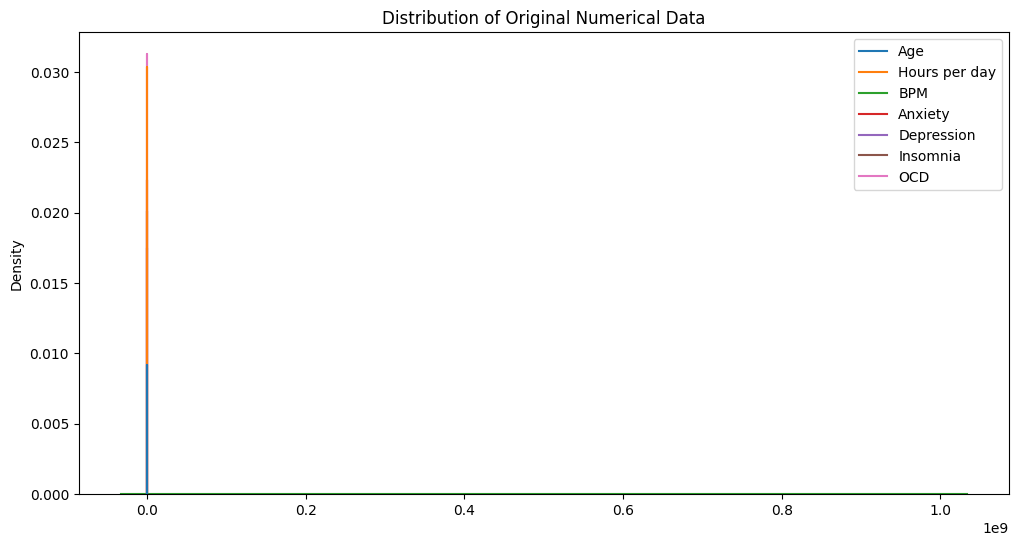

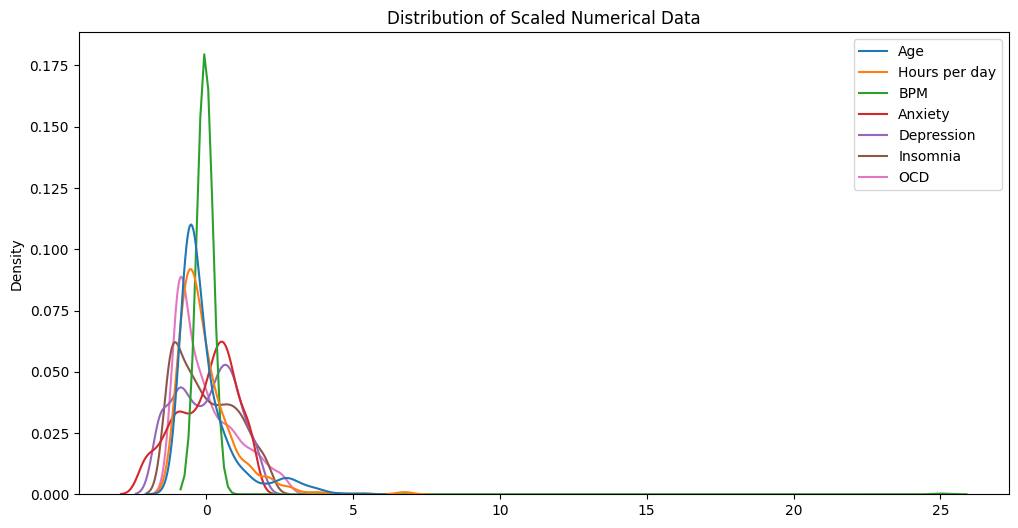

In [220]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=num_df, ax=ax)
ax.set_title('Distribution of Original Numerical Data')

fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=scaled_num_df, ax=ax)
ax.set_title('Distribution of Scaled Numerical Data')

plt.show()